Continuous-time model
---

Let's order the infection times $t_{\pi_{1}}<t_{\pi_{2}}<\dots<t_{\pi_{N}}$
. Let $\lambda_{i}\left(t\right)$ be a time-dependent transmission
rate and $L_{i}\left(t\right)=\int_{0}^{t}\lambda_{ij}\left(s\right)ds$
its primitive. Then $\rho_{i}\left(t_i; t_j\right)=\lambda_{i}\left(t_i\right)e^{-\int_{t_j}^{t_i}\lambda_{i}\left(s\right)ds} = \lambda_{i}\left(t_j\right)e^{L_{i}(t_j) - L_{i}(t_i) }$
will be the transmission ``delay'' density distribution. 

\begin{align*}p\left(t_{1},\dots,t_{N}\right) & =\prod_{i=1}^{N}\lim_{ds\to0^{+}}\frac{\prod_{j\in\partial i:t_{j}<t_{i}}e^{L_{i}(t_{j})-L_{i}(t_{i}-ds)}-\prod_{j\in\partial i:t_{j}<t_{i}}e^{L_{i}(t_{j})-L_{i}(t_{i})}}{ds}\\
 & =\prod_{i=1}^{N}\frac{d}{ds}_{|s=0}\prod_{j\in\partial i:t_{j}<t_{i}}e^{L_{i}(t_{j})-L_{i}(t_{i}-ds)}\\
 & =\prod_{i=1}^{N}\left\{ \left(\prod_{j\in\partial i:t_{j}<t_{i}}e^{L_{i}(t_{j})-L_{i}(t_{i})}\right)\sum_{j\in\partial i:t_{j}<t_{i}}\lambda_{i}\left(t_{i}\right)\right\} \\
\mathcal{L}_{0}\left(t_{1},\dots,t_{N}\right) & =\log p\left(t_{1},\dots,t_{N}\right)\\
 & =-\sum_{i=1}^{N}\left\{ \sum_{j\in\partial i:t_{j}<t_{i}}\left(L_{i}(t_{i})-L_{i}(t_{j})\right)-\log\left(\sum_{j\in\partial i:t_{j}<t_{i}}\lambda_{i}\left(t_{i}\right)\right)\right\} 
\end{align*}

Note that $$\int_{t_j}^{t_i} \rho_{i}(s; t_j) ds = 1-e^{-\left(L_{i}(t_i) - L_{i}(t_j)\right)}$$ so $$\lambda_{i}(t) = -\frac{d}{dt}\log \left(1-\int_{t_j}^{t_i} \rho_{i}(s) ds\right)$$


\begin{align}\lambda(t) & =ae^{-\left(\frac{t-b}{c}\right)^{2}}\\
\frac{x-b}{c} & =\frac{y}{\sqrt{2}}\\
dx & =\frac{c}{\sqrt{2}}dy\\
L(t)=\int_{0}^{t}ae^{-\left(\frac{x-b}{c}\right)^{2}}dx & = ac\int_{\frac{0-b}{c}}^{\frac{t-b}{c}}e^{-y^{2}}dy\\
 & =ac\sqrt{\pi}\frac{1}{\sqrt{\pi}}\int_{-\frac{b}{c}}^{\frac{t-b}{c}}e^{-y^{2}}dy\\
 & =\frac{ac\sqrt{\pi}}{2}\left(\mathrm{erfc}\left(-\frac{t-b}{c}\right)-\mathrm{erfc}\left(\frac{b}{c}\right)\right)\\
\rho_{i}\left(t_{i};t_{j}\right) & =\lambda_{i}\left(t_{i}\right)e^{-\int_{t_{j}}^{t_{i}}\lambda_{i}\left(s\right)ds}=\lambda_{i}\left(t_{i}\right)e^{L_{i}(t_{j})-L_{i}(t_{i})}\\
\frac{d}{ds}-e^{L_{i}(t_{j})-L_{i}(s)} & =\lambda\left(s\right)e^{L_{i}(t_{j})-L_{i}(s)}=\rho_{i}\left(s;t_{j}\right)\\
\end{align}

Sampling 
---
\begin{align}
\int_{t_{j}}^{t}\rho(s;t_{j})ds & =1-e^{L_{i}(t_{j})-L_{i}(t)}=1-r\sim U(0,1)\\
e^{L_{i}(t_{j})-L_{i}(t)} & =r\\
L_{i}(t) & =L_{i}\left(t_{j}\right)-\log(r)\\
\mathrm{erfc}\left(-\frac{t-b}{c}\right) & =\frac{2}{ac\sqrt{\pi}}\left(L_{i}\left(t_{j}\right)-\log(r)\right)+\mathrm{erfc}\left(\frac{b}{c}\right)\\
t & =-c\,\mathrm{ierfc}\left(\frac{2}{ac\sqrt{\pi}}\left(L_{i}\left(t_{j}\right)-\log(r)\right)+\mathrm{erfc}\left(\frac{b}{c}\right)\right)+b
\end{align}

In [6]:
using Causality
using IntervalUnionArithmetic

┌ Info: Precompiling Causality [943c2df0-3341-4665-8895-8aff0dd63d80]
└ @ Base loading.jl:1423
  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **



In [7]:
using SparseArrays, LinearAlgebra
T, N = 20.0, 50
ρ = 3/N
G = Causality.makeGNP(N,ρ)

Causality.SparseMatrixDiGraph{Int64}(sparse([3, 43, 10, 20, 1, 10, 40, 48, 10, 18  …  28, 3, 37, 39, 46, 27, 9, 28, 38, 40], [1, 1, 2, 2, 3, 3, 3, 3, 4, 4  …  47, 48, 48, 48, 48, 49, 50, 50, 50, 50], [π, π, π, π, π, π, π, π, π, π  …  π, π, π, π, π, π, π, π, π, π], 50, 50), sparse([3, 43, 10, 20, 1, 10, 40, 48, 10, 18  …  28, 3, 37, 39, 46, 27, 9, 28, 38, 40], [1, 1, 2, 2, 3, 3, 3, 3, 4, 4  …  47, 48, 48, 48, 48, 49, 50, 50, 50, 50], [5, 140, 27, 67, 1, 28, 130, 158, 29, 59  …  93, 8, 119, 129, 153, 89, 26, 94, 124, 134], 50, 50))

In [8]:
getpar(pseed,autoinf::GaussianRate,inf_in::GaussianRate) = 
    [fill(pseed, 1, N);
     fill(autoinf.a, 1, N); fill(autoinf.b, 1, N); fill(autoinf.c, 1, N);
     fill(inf_in.a,   1, N); fill(inf_in.b, 1, N); fill(inf_in.c, 1, N)]


getpar(pseed,autoinf::GaussianRate,inf_in::GaussianRate, latency::GaussianRate, recov::GaussianRate) = 
    [fill(pseed, 1, N);
     fill(autoinf.a, 1, N); fill(autoinf.b, 1, N); fill(autoinf.c, 1, N);
     fill(inf_in.a,   1, N); fill(inf_in.b, 1, N); fill(inf_in.c, 1, N);
     fill(latency.a, 1, N); fill(latency.b, 1, N); fill(latency.c, 1, N);
     fill(recov.a, 1, N); fill(recov.b, 1, N); fill(recov.c, 1, N)
    ]

getpar (generic function with 2 methods)

In [9]:
#Initialize generation parameters
ε = 1e-10
λ = 0.5
pseed = 1/N 
autoinf = GaussianRate(ε, T/2, 1/ε)
inf_in = GaussianRate(1.0, T/2, 1/ε)
latency = GaussianRate(1., T/2, 1/ε)
l_delay = GaussianRate(40., 1., 1.)
recov = GaussianRate(1., T/2, 1/ε)
r_delay = GaussianRate(0.5, 1., 1.)
out = ConstantRate(λ)

θp = getpar(pseed, autoinf, inf_in, latency, recov);

In [10]:
#Initialize min/max boundaies
pseed_min = ε
pseed_max = 1-ε
rate_min = GaussianRate(ε  ,  -T,   ε)
rate_max = GaussianRate(1/ε  ,  2T,   1/ε)

θmin = getpar(pseed_min , rate_min, rate_min, rate_min, rate_min);
θmax = getpar(pseed_max , rate_max, rate_max, rate_max, rate_max);

In [11]:
const I = IndividualSEIR{GaussianRate,GaussianRate,GaussianRate,GaussianRate}

IndividualSEIR{GaussianRate, GaussianRate, GaussianRate, GaussianRate}

In [12]:
Mp = StochasticModel(I, T, θp, G, (out, l_delay, r_delay));
sample! = Sampler(Mp);

In [13]:
xtrue = zeros(N,3)
sample!(xtrue)
nobs, p = 5, 1e-6
O = [(ti = T*(1+rand())/2; (i,xtrue[i,2] < ti < xtrue[i,3],ti,p)) for i=1:nobs]

5-element Vector{Tuple{Int64, Bool, Float64, Float64}}:
 (1, 1, 11.540845367124037, 1.0e-6)
 (2, 0, 11.73825269967271, 1.0e-6)
 (3, 0, 12.663071773041672, 1.0e-6)
 (4, 0, 10.42487231279602, 1.0e-6)
 (5, 1, 18.44198199189174, 1.0e-6)

In [14]:
sum(xtrue .< T)

103

In [15]:
xtrue

50×3 Matrix{Float64}:
  0.238767   0.382604   20.0
 20.0       20.0        20.0
  1.92697    2.04949     2.12801
  2.54969    2.5628      2.68417
  4.27333    4.27507    20.0
 20.0       20.0        20.0
  4.66462    4.78665    20.0
 20.0       20.0        20.0
  1.78229    1.86806     2.2276
  1.26222    1.36953     1.93689
  5.89806    5.93964     8.5127
  1.01073    1.1273      3.4302
  1.71611    1.79198    20.0
  ⋮                     
  0.89767    0.903683    2.13628
  2.07701    2.21834     2.75796
  7.47112    7.58819    20.0
  2.4425     2.46982     4.11348
  0.0        0.0207971   1.37275
  3.44358    3.44848    20.0
  6.19144    6.2537     20.0
  1.68017    1.69494     2.12125
  3.5131     3.61283    20.0
 20.0       20.0        20.0
 20.0       20.0        20.0
  4.91873    5.05961     6.43186

In [21]:
#Initialize softened model
T = Float64(T)
ε = 2e-3
pseed = 1/N 
autoinf = GaussianRate(ε, T/2, 3*T)
inf_in = GaussianRate(1.0, T/2, 1/ε)
θp2 = getpar(pseed, autoinf, inf_in, latency, recov);
Mp2 = StochasticModel(I, T, θp2, G, (out, l_delay, r_delay));

In [22]:
#Initialize the parameters to learn
θ = getpar(pseed, autoinf, inf_in,  latency, recov);
M = StochasticModel(I, T, θ, G, (out, l_delay, r_delay));

In [23]:
using ProgressMeter
ProgressMeter.ijulia_behavior(:clear)
descend!(Mp2, O; M=M, numsamples=1500, numiters=100, 
         θmin=θmin, θmax=θmax, descender=SignDescender(0.1));
descend!(Mp2, O; M=M, numsamples=1500, numiters=100, 
         θmin=θmin, θmax=θmax, descender=SignDescender(0.03));

Progress: 100%|█████████████████████████████████████████| Time: 0:00:10
  F:  7.594983428735767


In [24]:
function histo(v; bins=20, up=1.0)
    h = zeros(bins+1)
    z = length(v)
    for x in v
        h[floor(Int, x*bins/up)+1]+=1/z
    end
    h
end

histo (generic function with 1 method)

In [25]:
stats = post(Mp, O, numsamples=10000);

Progress: 100%|█████████████████████████████████████████| Time: 0:00:15


In [26]:
statscau = prior(M);

Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


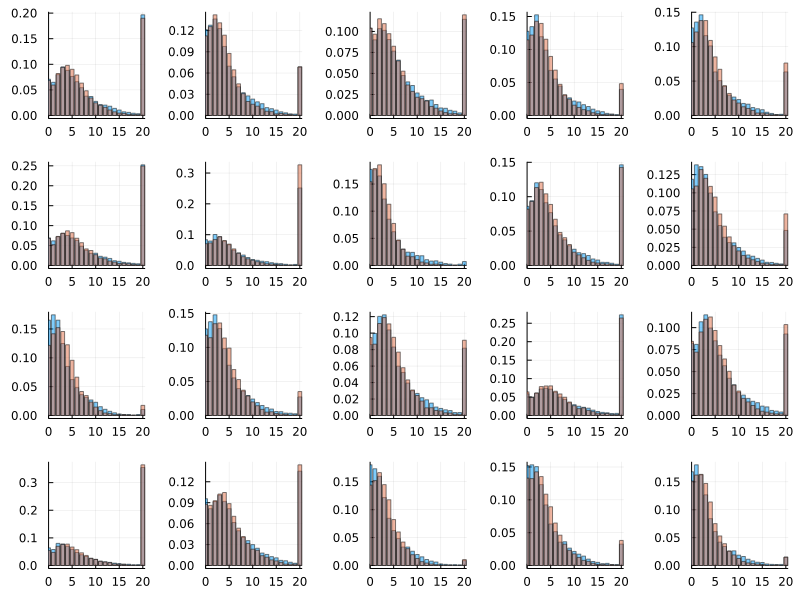

In [43]:
using Plots
state = 1
pl = map(21:40) do k
    p = plot()
    bar!(p, 0:M.T/20:M.T, histo((@view statscau[:, k, state]), up=M.T), alpha=0.5, xlims=(0,M.T+0.5), bins=20, label="cau", legend=false);
    bar!(p, 0:M.T/20:M.T, histo((@view stats[:, k, state]), up=M.T),    alpha=0.5, xlims=(0,M.T+0.5), bins=20, label="true", legend=false);
end;
plot(pl..., size=(800,600))

In [44]:
statscau[:,2,:]

10000×3 Matrix{Float64}:
 20.0       20.0       20.0
  2.90357    2.92044    3.02249
 15.4823    15.5721    15.8903
  0.0        0.149165   0.468542
  5.23597    5.24041    5.24845
  1.94201    1.95174    4.121
  5.97105    6.10292    6.15446
 20.0       20.0       20.0
 19.9423    20.0       20.0
 20.0       20.0       20.0
  1.2113     1.22593    1.44781
 20.0       20.0       20.0
 20.0       20.0       20.0
  ⋮                    
 20.0       20.0       20.0
  3.40061    3.40404    3.64402
  0.968737   1.04319    2.20266
 14.3424    14.362     14.5557
  4.42738    4.55476    4.94025
 14.4186    14.4833    14.9532
  4.60318    4.62821    4.7452
  7.2572     7.28556    7.74523
  2.91918    2.95909    3.30688
 10.3226    10.3448    10.5847
  1.8899     1.89377    2.1016
 18.7085    18.7449    18.8402

In [45]:
O

5-element Vector{Tuple{Int64, Bool, Float64, Float64}}:
 (1, 1, 11.540845367124037, 1.0e-6)
 (2, 0, 11.73825269967271, 1.0e-6)
 (3, 0, 12.663071773041672, 1.0e-6)
 (4, 0, 10.42487231279602, 1.0e-6)
 (5, 1, 18.44198199189174, 1.0e-6)

In [46]:
xtrue

50×3 Matrix{Float64}:
  0.238767   0.382604   20.0
 20.0       20.0        20.0
  1.92697    2.04949     2.12801
  2.54969    2.5628      2.68417
  4.27333    4.27507    20.0
 20.0       20.0        20.0
  4.66462    4.78665    20.0
 20.0       20.0        20.0
  1.78229    1.86806     2.2276
  1.26222    1.36953     1.93689
  5.89806    5.93964     8.5127
  1.01073    1.1273      3.4302
  1.71611    1.79198    20.0
  ⋮                     
  0.89767    0.903683    2.13628
  2.07701    2.21834     2.75796
  7.47112    7.58819    20.0
  2.4425     2.46982     4.11348
  0.0        0.0207971   1.37275
  3.44358    3.44848    20.0
  6.19144    6.2537     20.0
  1.68017    1.69494     2.12125
  3.5131     3.61283    20.0
 20.0       20.0        20.0
 20.0       20.0        20.0
  4.91873    5.05961     6.43186

In [47]:
i=2

2

In [48]:
M.θ[:,i][1], pseed

(0.019483591096568248, 0.02)

In [49]:
M.θ[:,i][2:4], autoinf

([0.001470617182372678, 1.9598969081261541, 79.05208630448546], GaussianRate{Float64}(0.002, 10.0, 60.0))

In [50]:
M.θ[:,i][5:7], inf_in

([0.9944723557854208, 2.538944872068999, 18.498678865249364], GaussianRate{Float64}(1.0, 10.0, 500.0))

In [51]:
M.θ[:,i][8:10], latency

([0.9944723557854201, 0.8428011433441007, 1.5073771890271528e9], GaussianRate{Float64}(1.0, 10.0, 1.0e10))

In [36]:
M.θ[:,i][11:13], recov

([4.952153762689532, 17.391626930606982, 1.4717399495252295e9], GaussianRate{Float64}(1.0, 10.0, 1.0e10))

## Marginals and ROC curve

In [37]:
function marginal(i, t, stats)
    numsamp = size(stats,1)
    sum( stats[:,i,2] .< t .< stats[:,i,3] ) / numsamp
end

function tpr(xtrue, rank) 
    cumsum(xtrue[rank]) ./( cumsum(xtrue[rank])[end])
end

function fpr(xtrue, rank) 
    N = size(rank,1)
    return (range(1,N,length=N) .- cumsum(xtrue[rank])) ./ (range(1,N,length=N) .- cumsum(xtrue[rank]) )[end]
end

function ROC(xtrue, p)
    N = size(xtrue,1)
    rank = sortperm(p, rev=true)
    
    return fpr(xtrue, rank) , tpr(xtrue, rank)
end

function AUROC(ROC)
    N = size(ROC[1],1) 
    AU = 0
    for t = 1:N-1
        AU += ROC[2][t] * (ROC[1][t+1] - ROC[1][t])
    end
    return AU
end

AUROC (generic function with 1 method)

In [38]:
O

5-element Vector{Tuple{Int64, Bool, Float64, Float64}}:
 (1, 1, 11.540845367124037, 1.0e-6)
 (2, 0, 11.73825269967271, 1.0e-6)
 (3, 0, 12.663071773041672, 1.0e-6)
 (4, 0, 10.42487231279602, 1.0e-6)
 (5, 1, 18.44198199189174, 1.0e-6)

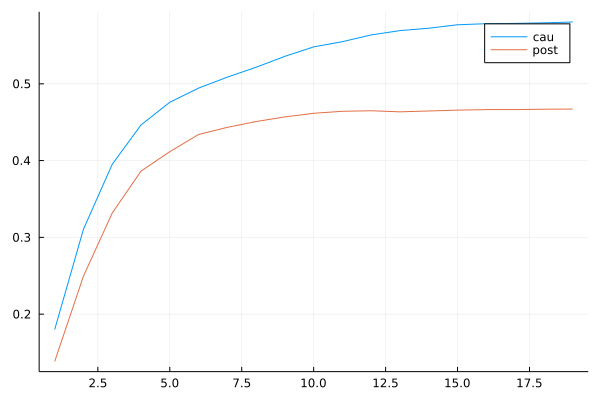

In [39]:
using Plots
p_cau = zeros(N,Int(T))
p_exact = zeros(N,Int(T))
for i = 1:N
    for t = 1:Int(T)
       p_cau[i,t] = marginal(i, t, statscau)
       p_exact[i,t] = marginal(i, t, stats)
    end
end
i = 9
plot(p_cau[i,1:end-1], label = "cau")
plot!(p_exact[i,1:end-1], label = "post")

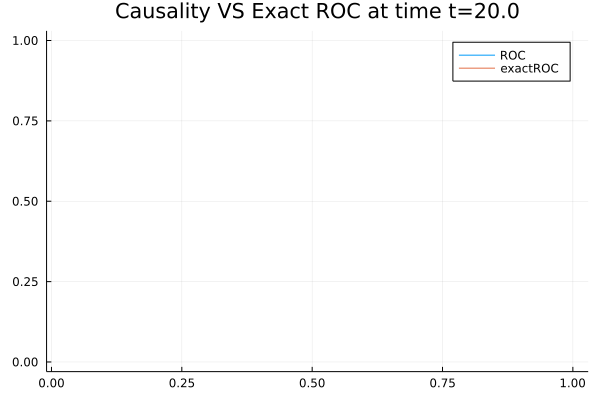

In [40]:
#Let us find the ROC of the infected individuals at time t

t = T
epidemic_risk=zeros(N)
true_risk=zeros(N)
for i=1:N
   epidemic_risk[i] = marginal(i,t,statscau)
   true_risk[i] = marginal(i,t,stats)
end
xt = xtrue[:,2] .< t .< xtrue[:,3]
plot(ROC(xt, epidemic_risk)[1],ROC(xt, epidemic_risk)[2], label="ROC", title="Causality VS Exact ROC at time t=$t")
plot!(ROC(xt, true_risk)[1],ROC(xt, true_risk)[2], label="exactROC")

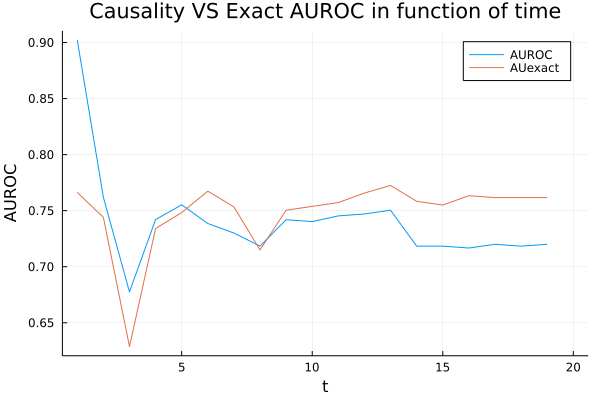

In [41]:
T = Int(T)
AU_curve=zeros(T)
AU_exact=zeros(T)
for t = 1:T
    epidemic_risk=zeros(N)
    true_risk=zeros(N)
    for i=1:N
       epidemic_risk[i] = marginal(i,t,statscau)
       true_risk[i] = marginal(i,t,stats)
    end
    xt = xtrue[:,2] .< t .< xtrue[:,3]
    AU_curve[t] = AUROC(ROC(xt, epidemic_risk))
    AU_exact[t] = AUROC(ROC(xt, true_risk))
end

plot(LinRange(1,T,T),AU_curve, label="AUROC", title="Causality VS Exact AUROC in function of time")
plot!(LinRange(1,T,T),AU_exact, label="AUexact")
T = Float64(T)
#savefig("SEIR_AUROC.pdf")
xlabel!("t")
ylabel!("AUROC")